# Hacklinger's Theories

One of the key assumptions in Doug’s method was based on an extensive study of indoor model aerodynamics conducted by Max Hacklinger {cite}`hacklinger1964`. After conducting many flight experiments, Max presented this equation to estimate flight times for indoor models.

\begin{equation}
time = H_eW_r/(2\pi Q_h n_h)
\end{equation}

Where He is a constant “energy height” which Max set at 900 meters, Wr is the weight of the motor, Q_h is the average torque over the flight, and n_h is the average flight prop speed (RPM) for the flight.
My first question was simple: Could this even remotely give us usable estimates? From Gary’s record flight, I have the launch torque, flight time, motor weight, and the number of turns expended during his record flight. I do not have an estimate of the torque averaged over the flight.  I wonder what Hacklinger’s formula will tell me. Let’s plug in some numbers and see. (No, I am not going to do this manually, I am a computer geek! Time for some Python):

In [4]:
import math
import pint
u = pint.UnitRegistry()

winds = 3660
Wr = 0.86 * u. grams
Q0 = 0.31 * u.inch * u.ounce
Qh = Q0 / 6
He= 900 * u.meters
flight_time = 618 * u. seconds
n_h = winds/flight_time
Time = He * Wr / (2 * math.pi * Qh * n_h)
Time.to_base_units()

559.0859314621183 <Unit('second')>

I used the actual flight time in this code to calculate the average prop speed. I had to guess the average torque for the flight. Otherwise, this is just Hacklinger’s equation at work. The predicted time looks promising, so maybe we are on to something.

The listing above is a screenshot of my *Jupyter Notebook* page where I developed the material presented in this article. 

[Jupyter](https://jupyter.org) is a very popular Python application that creates a web server on your local computer and launches your web browser giving you an environment where you can write text or code in a series of “cells”. Each page you create becomes part of your “notebook” where you document your research. The text cells are marked up using a simple notation called Markdown. Code cells can be written in one of several different programming languages, but the default language is Python.  As you write you can process each kind of cell to create either nice-looking documentation with equations, figures and anything else you need to explain what is going on or code you can run on the spot. You see the results immediately. If you make a mistake in your code or text, you can correct and reprocess with a mouse click. This is a great environment for doing quick analyses and experimenting with ideas. I use it to test snippets of code before pasting them into a real Python program. 

What you create is something called reproducible science where anyone with access to your *Jupyter Notebook* pages can generate the exact same results. As part of this article, I have set up a copy of this study on a free cloud service called [Binder](https://mybinder.org) that will let you work through this analysis using just your web browser. No setup required! Details are in the appendix.

What was that powerful Python tool I mentioned earlier? If you look closely at the code above, you will see something interesting. The import lines let your code access tools from the named *package*. A package is a collection of Python components you can use in your own code once the package is installed on your system. There are tons of useful packages available to Python programmers, many of which come with Python itself. In the second line in that listing, I am accessing the Python pint tool that lets you attach units to your numbers. pint will manage unit conversions for you automatically. This is a huge benefit when doing engineering calculations since you never really need to worry about entering ounces when your calculations needed grams! (Ask NASA about units gone wrong on one of their Mars Lander missions!) To use pint, you. Create a *UnitRegistry* which knows all about standard units and how to manage them. We use that registry gadget to assign units to our data, as you can see in the example code. Once set up, you never have to worry about what units you use, pint will handle conversions to make sure everything is consistent.

As it stands, I am not happy with Hacklinger’s equation. There is no mention of the airplane at all. We could be flying anything with a rubber motor attached, which is hardly realistic. McLean attacked this issue by adding in a bit more real aerodynamics, so the results made more sense. Let’s see what Python can offer in this kind of analysis.

In [ ]:
## Derivation of Hacklinger's Equation

This material is not in the article.

In [18]:
from IPython.display import Image

### Definitions

- Torque ($\tau$)  is the rotational equivalent of a linear force.
- Power ($P$) is the application of a work over some period of time. 
- Angular velocity ($\omega$) is the rotational speed.

These are related by this equation:

\begin{equation}
P = \tau \omega
\end{equation}

We know that the torque provided by our rubber motor varies greatly over the flight time. It is very high on launch causing the airplane to climb rapidly. As the *torque burst* fades, so does the climb, and we enter a period of cruise where altitude is lost slowly. Finally, the model descends to the ground. If we are lucky, the landing happens as the motor runs out of turns.

Unfortunately, data on the propeller RPM during a flight is difficule to obtain, the exact shape of the work done as a function of time is not known, but we have some data showing its general shape. From Hacklinger's paper, we see this curve:

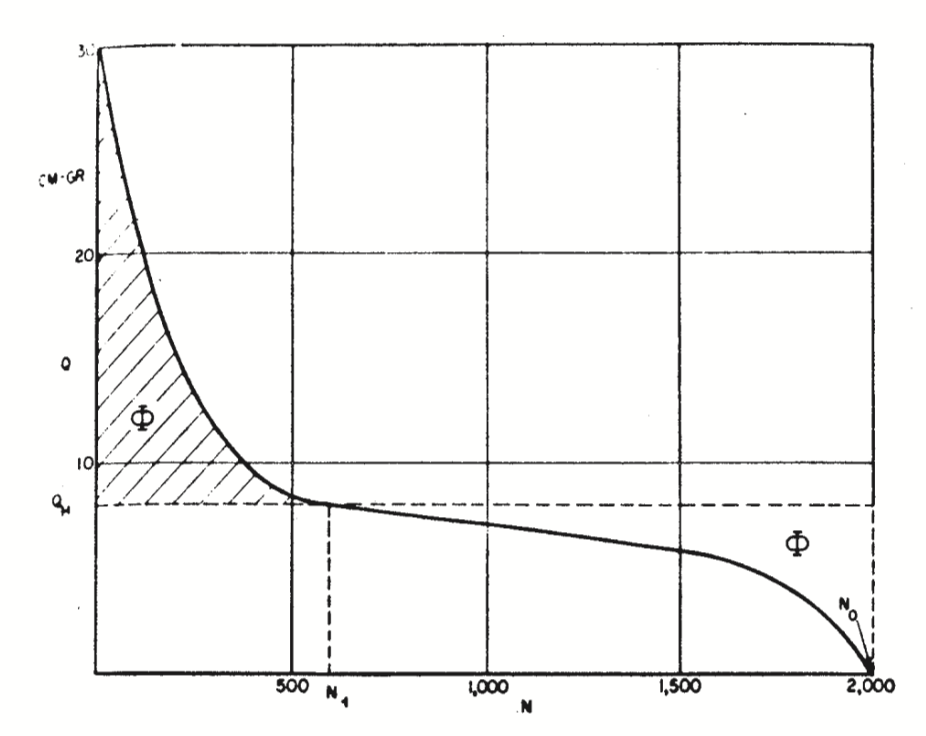

In [19]:
Image(filename='../../assets/images/torque-curve.png')

Hacklinger theorized that the energy expended in the climb is approximately equal to the energy expended during descent, so we should be able to use to the average energy labeled $Q_H$ in the figure to estimate flying time.

In working through the power available to an indoor model, he presented a term called the *Energy Height* which is defined as follows:
    
\begin{equation}
H_e = \frac{work}{w_{motor}}
\end{equation}

Work is the application of a force over a distance. The fore we are interested in from our propeller is the thrust force $T$.

\begin{equation}
W = T x
\end{equation}

Where $X$ is the distance we have moved.

Taking the derivative of this equation gives:

\begin{equation}
\frac{dW}{dt} = T \frac{dx}{dt} + x \frac{dT}{dt}
\end{equation}
Testing showed that for indoor models, $H_e$ is approximately constant and has a value of 900 meters.

Velocity is the time rate of change of distance. If the Work expended varies over time, so the Thrust must also vary over time if this equation is o hold. Therefore:


If $\eta$ is the propeller efficiency, which is a measure of its ability to convert the torque applied to the propeller to the increase in velocity of the asir through the propeller disk, then we get this equation:

\begin{equation}
t = \eta E/P
\end{equation}

Where $E$ is the available energy, and $P$ is the power available from the propeller.

Hacklinger then provides an equation for the rate of climb of a model

\begin{equation}
\frac{dh}{dt} = \frac{P \eta}{W} - \sqrt{\frac{2 W C_d^2}{\rho S C_l^3}}
\end{equation}

\begin{equation}
\frac{dh}{dt} = \frac{\eta}{W} \frac{dE}{dt} - k_1\sqrt{W}
\end{equation}

In [20]:
import sympy

W, eta, K_1, t = sympy.symbols('W eta K_1 t')

In [21]:
import sympy as sp
from sympy import sin, cos, Function

t = sp.symbols('t')
E = Function('E')
f = E(t)
df = sp.diff(f, t)
df

Derivative(E(t), t)

In [22]:
df2 = df * eta/W + K_1 * sympy.sqrt(W)
df2

K_1*sqrt(W) + eta*Derivative(E(t), t)/W

In [23]:
df3 = sympy.integrate(df2,t)
df3

K_1*sqrt(W)*t + eta*E(t)/W

We need to add in a constant of integration, $K_2$you  and rel=placem have $E(t) with just E. So we get this equation:
    

In [24]:
h, K_2,e_t = sympy.symbols('h K_2 e_t')
df4 = - h + K_1 * sympy.sqrt(W)*t + eta* e_t / W + K_2
df4

K_1*sqrt(W)*t + K_2 - h + e_t*eta/W

In [25]:
df5 = sympy.solve(df4,t)
df6 = df5[0]
df6.simplify()

-(W*(K_2 - h) + e_t*eta)/(K_1*W**(3/2))

To satisfy the condition that at time zero, the height zero, and we have expended no energy. therefore, we need to set $K_2$ to zero.